### Calculating the delta Nautical Area Scattering Coefficient using Water Column Sonar data
### Meredith Jackson, Geography department @ CU Boulder

##### Raw sonar data processed with Echoview 
##### See [https://www.ngdc.noaa.gov/maps/water_column_sonar/index.html]

In [9]:
# load necessary libraries for exploratory analysis and visualization 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [10]:
df120 = pd.read_csv("120kHz.csv", skipinitialspace=True)
df120["Depth Group"] = pd.cut(df120['Layer_depth_max'], [0, 250, 500, 750])

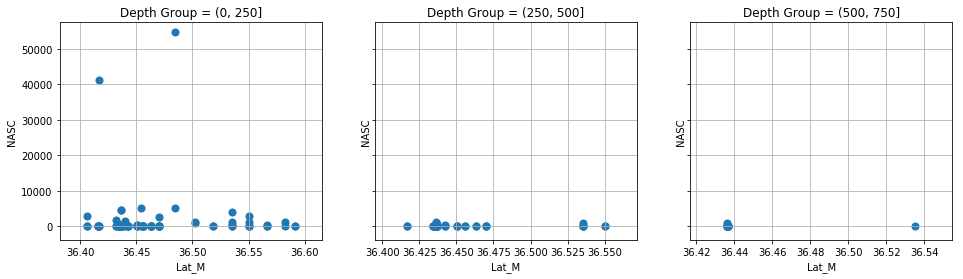

In [3]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
for ax, (group, df) in zip(axes, df120.groupby("Depth Group")):
    ax.scatter(df.Lat_M, df.NASC, s=50)
    ax.set_title("Depth Group = %s" % group)
    ax.set_ylabel("NASC")
    ax.set_xlabel("Lat_M")
    ax.grid()
plt.show()

In [4]:
df38 = pd.read_csv("38kHz.csv", skipinitialspace=True)
df38["Depth Group"] = pd.cut(df120['Layer_depth_max'], [0, 250, 500, 750])

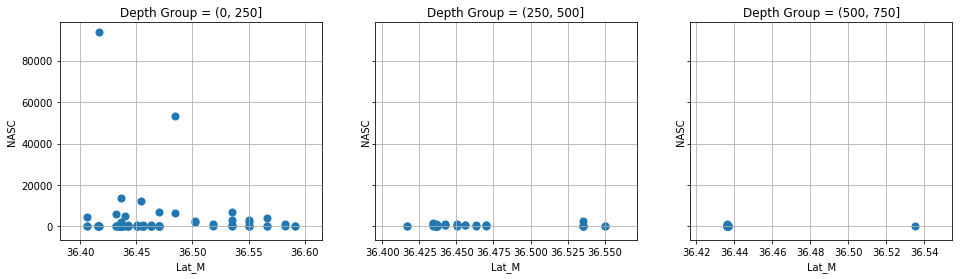

In [5]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
for ax, (group, df) in zip(axes, df38.groupby("Depth Group")):
    ax.scatter(df.Lat_M, df.NASC, s=50)
    ax.set_title("Depth Group = %s" % group)
    ax.set_ylabel("NASC")
    ax.set_xlabel("Lat_M")
    ax.grid()
plt.show()

In [12]:
# Delta NASC is difference between NASC coefficients for 120hz and 38hz
df120["$\Delta N$"] = df120["NASC"] - df38["NASC"]
new = df120[df120["$\Delta N$"] > -10000]

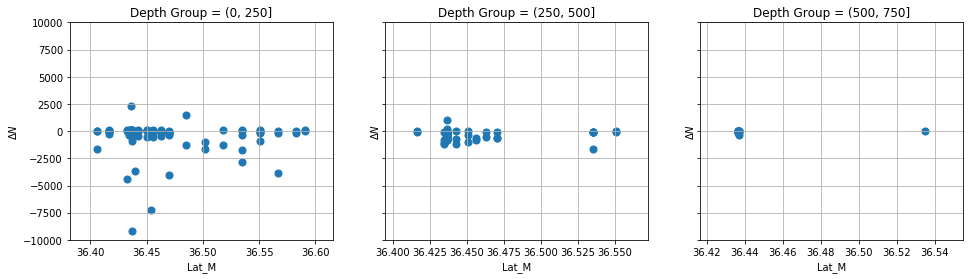

In [7]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
for ax, (group, df) in zip(axes, df120.groupby("Depth Group")):
    ax.scatter(df.Lat_M, df["$\Delta N$"], s=50)
    ax.set_title("Depth Group = %s" % group)
    ax.set_ylabel("$\Delta N$")
    ax.set_xlabel("Lat_M")
    ax.grid()
    ax.set_ylim([-10000,10000])
plt.show()

In [8]:
new.head()

,Process_ID,Interval,Layer,Sv_mean,NASC,Height_mean,Depth_mean,Layer_depth_min,Layer_depth_max,Ping_S,...,Noise_Sv_1m,Minimum_Sv_threshold_applied,Maximum_Sv_threshold_applied,Standard_deviation,Thickness_mean,Range_mean,Exclude_below_line_range_mean,Exclude_above_line_range_mean,Depth Group,$\Delta N$
0,23,1,1,-75.182582,58.789214,44.984619,27.835275,0.0,50.0,0,...,-999.0,0,0,6.637218e-08,44.984619,27.835275,-9999.0,5.0,"(0, 250]",55.808657
1,23,1,2,-85.995080,5.363404,49.483081,75.069125,50.0,100.0,0,...,-999.0,0,0,2.985910e-09,49.483081,75.069125,-9999.0,5.0,"(0, 250]",-8.391540
2,23,1,3,-75.510386,60.875264,50.232825,124.927078,100.0,150.0,0,...,-999.0,0,0,4.460540e-08,50.232825,124.927078,-9999.0,5.0,"(0, 250]",23.478082
3,23,1,4,-75.483964,61.246754,50.232825,175.159903,150.0,200.0,0,...,-999.0,0,0,3.926309e-08,50.232825,175.159903,-9999.0,5.0,"(0, 250]",-133.367149
4,23,1,5,-74.510928,75.484152,49.483081,225.017855,200.0,250.0,0,...,-999.0,0,0,4.367170e-08,49.483081,225.017855,-9999.0,5.0,"(0, 250]",-876.241336
